
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

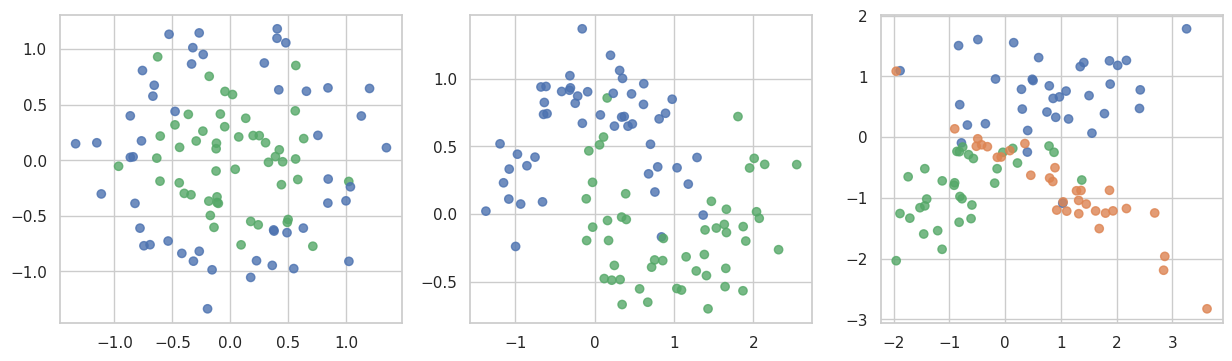

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

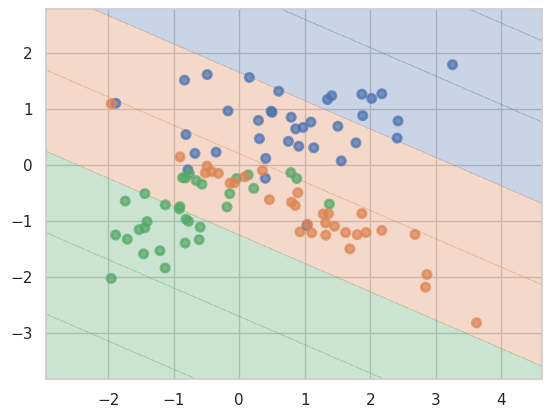

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1 - Train Accuracy: 1.0000, Test Accuracy: 0.7333
Dataset 2 - Train Accuracy: 1.0000, Test Accuracy: 0.8667
Dataset 3 - Train Accuracy: 1.0000, Test Accuracy: 0.8333


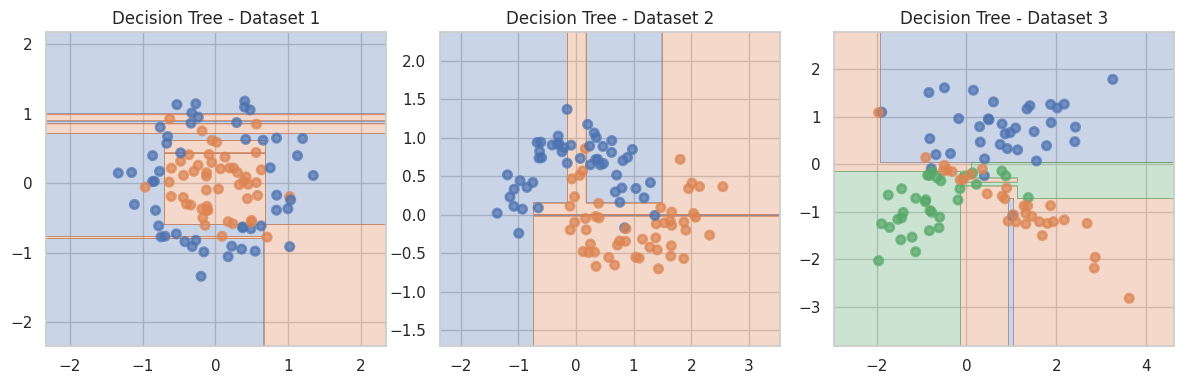

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разбиение на обучающую и тестовую выборки для каждого датасета
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Создаем 1 строку и 3 столбца для графиков

for i, dataset in enumerate(datasets):
    X, y = dataset

    # Разбиение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучение решающего дерева
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Предсказания и точность
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Dataset {i + 1} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Визуализация разделяющих поверхностей
    plt.subplot(1, 3, i + 1)  # Указываем номер подграфика
    plot_surface(clf, X, y)   # Рисуем график
    plt.title(f"Decision Tree - Dataset {i + 1}")  # Устанавливаем заголовок для каждого графика

# Показываем все графики в одном окне
plt.tight_layout()
plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

*   Первая модель сильно переобучилась, модель плохо обобщает данные
*   Вторая и вторая модели запомнили тестовые данные, но в целом, обобщает приемлимо. Третья модель переобучилась сильнее второй

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Dataset 1:
Params: {'max_depth': 2, 'min_samples_leaf': 1}, Train Accuracy: 0.8286, Test Accuracy: 0.6333
Params: {'max_depth': 3, 'min_samples_leaf': 2}, Train Accuracy: 0.8714, Test Accuracy: 0.7667
Params: {'max_depth': 4, 'min_samples_leaf': 3}, Train Accuracy: 0.9429, Test Accuracy: 0.7333


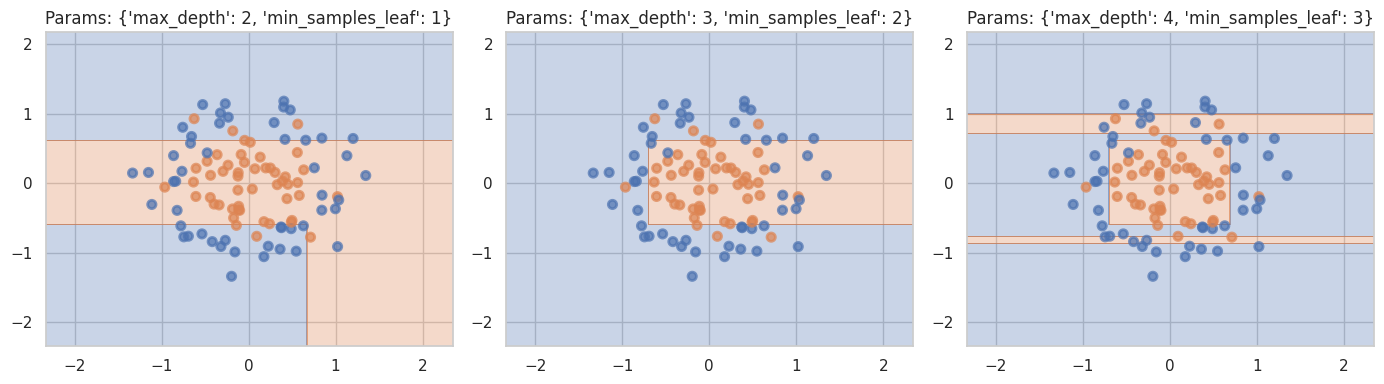


Dataset 2:
Params: {'max_depth': 2, 'min_samples_leaf': 1}, Train Accuracy: 0.9143, Test Accuracy: 0.9333
Params: {'max_depth': 3, 'min_samples_leaf': 2}, Train Accuracy: 0.9143, Test Accuracy: 0.8333
Params: {'max_depth': 4, 'min_samples_leaf': 3}, Train Accuracy: 0.9857, Test Accuracy: 0.7667


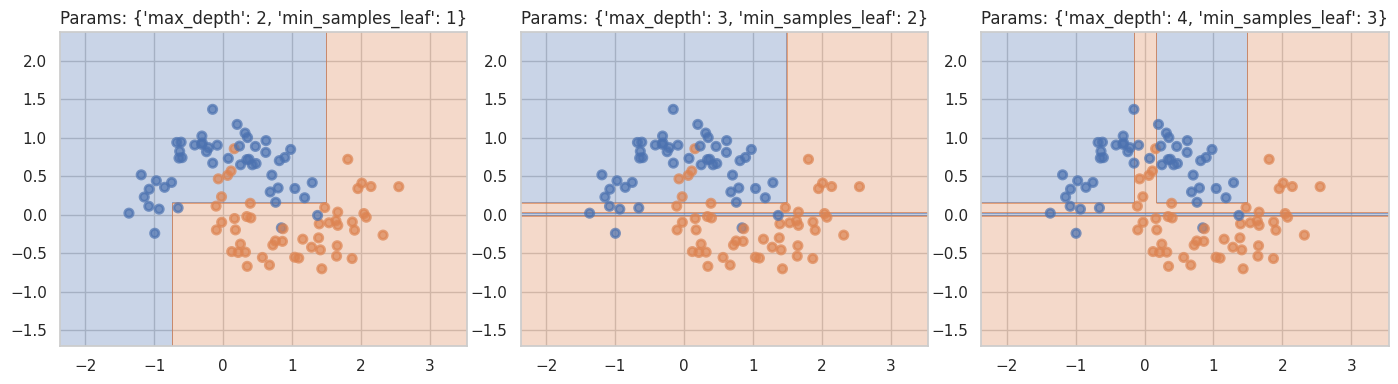


Dataset 3:
Params: {'max_depth': 2, 'min_samples_leaf': 1}, Train Accuracy: 0.9000, Test Accuracy: 0.7667
Params: {'max_depth': 3, 'min_samples_leaf': 2}, Train Accuracy: 0.9143, Test Accuracy: 0.8667
Params: {'max_depth': 4, 'min_samples_leaf': 3}, Train Accuracy: 0.9143, Test Accuracy: 0.7667


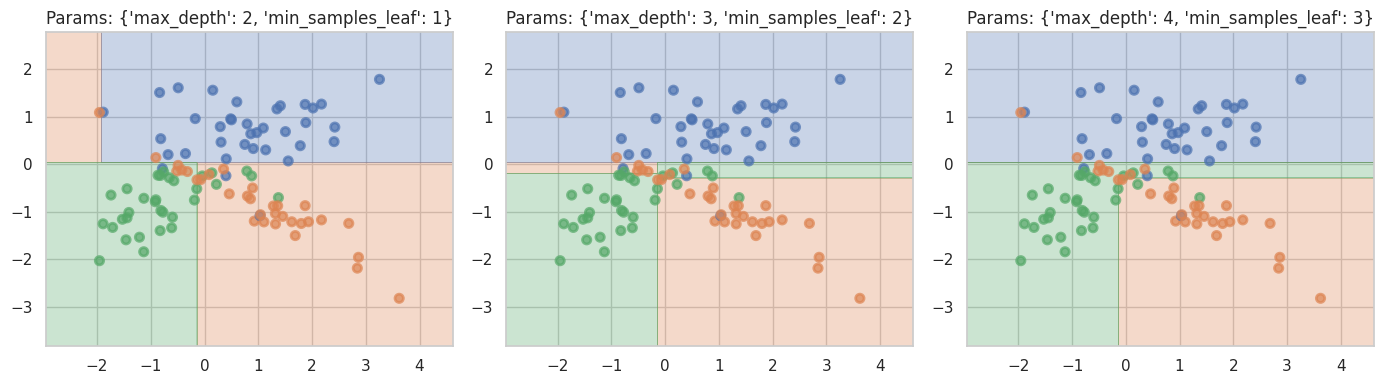

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Сетка параметров для перебора
param_grid = [
    {"max_depth": 2, "min_samples_leaf": 1},
    {"max_depth": 3, "min_samples_leaf": 2},
    {"max_depth": 4, "min_samples_leaf": 3},
]

# Разбиение на подграфики
for dataset_idx, dataset in enumerate(datasets):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f"\nDataset {dataset_idx + 1}:")

    fig, axes = plt.subplots(1, 3, figsize=(14, 4))  # Один ряд из трёх графиков для каждого набора данных

    for param_idx, (params, ax) in enumerate(zip(param_grid, axes)):
        # Создание модели с текущими параметрами
        clf = DecisionTreeClassifier(
            max_depth=params["max_depth"],
            min_samples_leaf=params["min_samples_leaf"],
            random_state=42
        )
        clf.fit(X_train, y_train)

        # Вычисление точности
        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        print(f"Params: {params}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # Визуализация
        plt.sca(ax)  # Устанавливаем текущий подграфик
        plot_surface(clf, X, y)
        ax.set_title(f"Params: {params}")

    # Показываем три графика для текущего набора данных
    plt.tight_layout()
    plt.show()



__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Увеличение глубины дерева позволяет модели лучше запоминать данные, но это увеличивает риск переобучения, особенно для простых датасетов.

Параметр минимального числа объектов в листе сглаживает разделяющую поверхность и помогает бороться с переобучением.

Влияние гиперпараметров различается в зависимости от структуры (сложности)  данных.

Простые датасеты  make_moons или make_circles, обобщаются лучше при меньшей глубине дерева и большем минимальном числе объектов в листе.

Более сложный датасет make_classification требует большей гибкости, что достигается увеличением глубины, но при этом важна и регуляризация, чтобы избежать чрезмерного запоминания данных.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

In [20]:
%load_ext autoreload

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import os
os.chdir('/content/drive/My Drive/LR6')

In [23]:
%autoreload 2
import numpy as np
from tree_code import find_best_split

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [24]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтение данных
data = pd.read_csv('students.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.2 KB


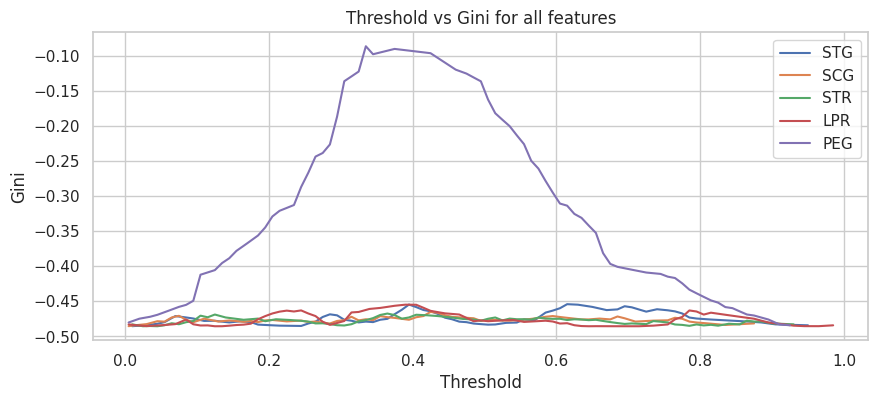

In [34]:
# Разделение признаков и целевой переменной
features = data.iloc[:, :-1]  # первые пять столбцов (признаки)
target = data['UNS']          # последний столбец (целевой класс)

# Функция для вычисления критерия Джини
def compute_gini(feature_vector, target_vector):
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    return thresholds, ginis

# Построение кривых "порог — значение критерия Джини" для всех признаков
plt.figure(figsize=(10, 4))
for column in features.columns:
    thresholds, ginis = compute_gini(features[column].values, target.values)
    plt.plot(thresholds, ginis, label=column)

plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Threshold vs Gini for all features')
plt.legend()
plt.grid(True)
plt.show()

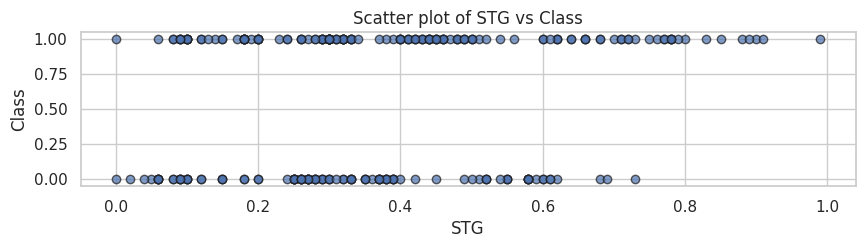

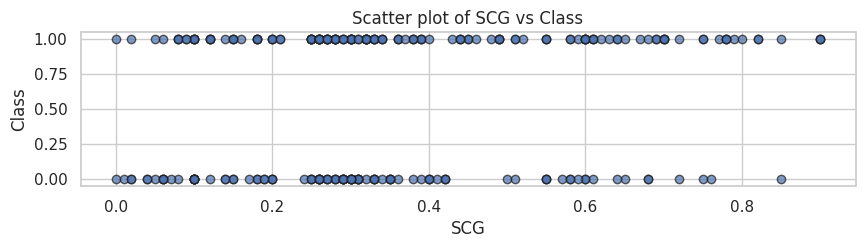

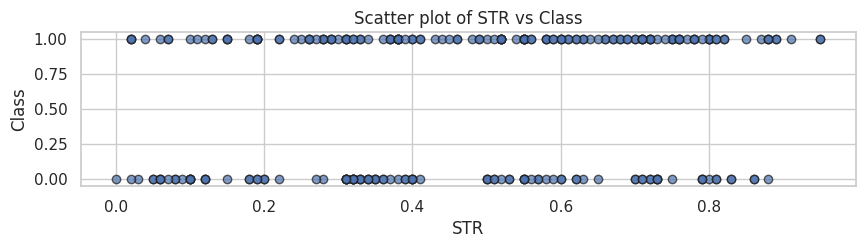

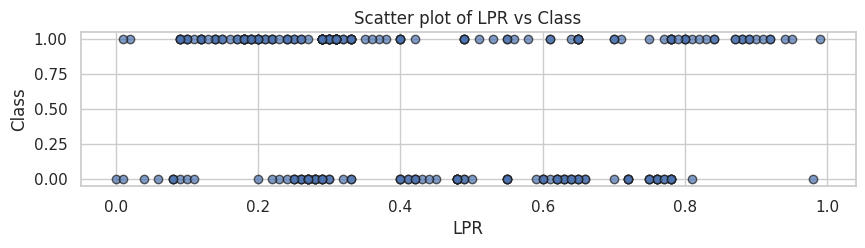

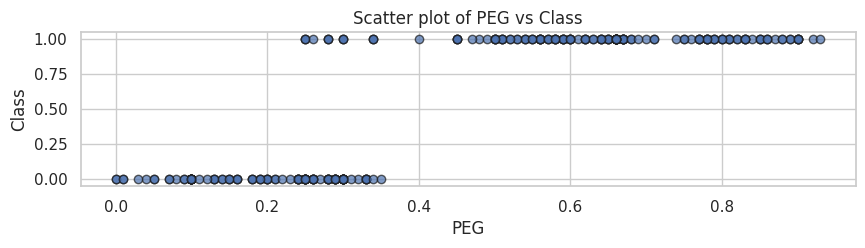

In [35]:
# Построение scatter-графиков для каждого признака
for column in features.columns:
    plt.figure(figsize=(10, 2))
    plt.scatter(features[column], target, alpha=0.7, edgecolors='k')
    plt.xlabel(column)
    plt.ylabel('Class')
    plt.title(f'Scatter plot of {column} vs Class')
    plt.grid(True)
    plt.show()

In [31]:
features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target = data['UNS'].values

max_gini_drops = {}

# Для каждого признака рассчитываем критерий Джини
for feature in features:
    thresholds, ginis = compute_gini(data[feature].values, target)
    max_gini_drop = np.min(ginis)
    max_gini_drops[feature] = max_gini_drop

# Сортировка признаков по убыванию минимального значения
sorted_gini_drops = sorted(max_gini_drops.items(), key=lambda x: x[1])

# Вывод результатов
print("Параметры, отсортированные по значению параметра Джини (от лучшего к худшему):")
for feature, gini_drop in sorted_gini_drops:
    print(f"{feature}: минимальное значение критерия Джини = {gini_drop:.4f}")


Параметры, отсортированные по значению параметра Джини (от лучшего к худшему):
LPR: минимальное значение критерия Джини = -0.4855
STR: минимальное значение критерия Джини = -0.4854
STG: минимальное значение критерия Джини = -0.4853
SCG: минимальное значение критерия Джини = -0.4853
PEG: минимальное значение критерия Джини = -0.4841


__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

На основании кривых критерия Джини выборка должна быть разделена по признаку LPR, так как он имеет самое меньшее значение критерия Джини (-0.4855), что указывает на наибольшее улучшение разделения. Это совпадает с визуальной оценкой scatter-графиков. Если бы кривые имели более сглаженый вид то разделение было бы затруднительным. В целом на нашем наборе можно разделить по любому признаку.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




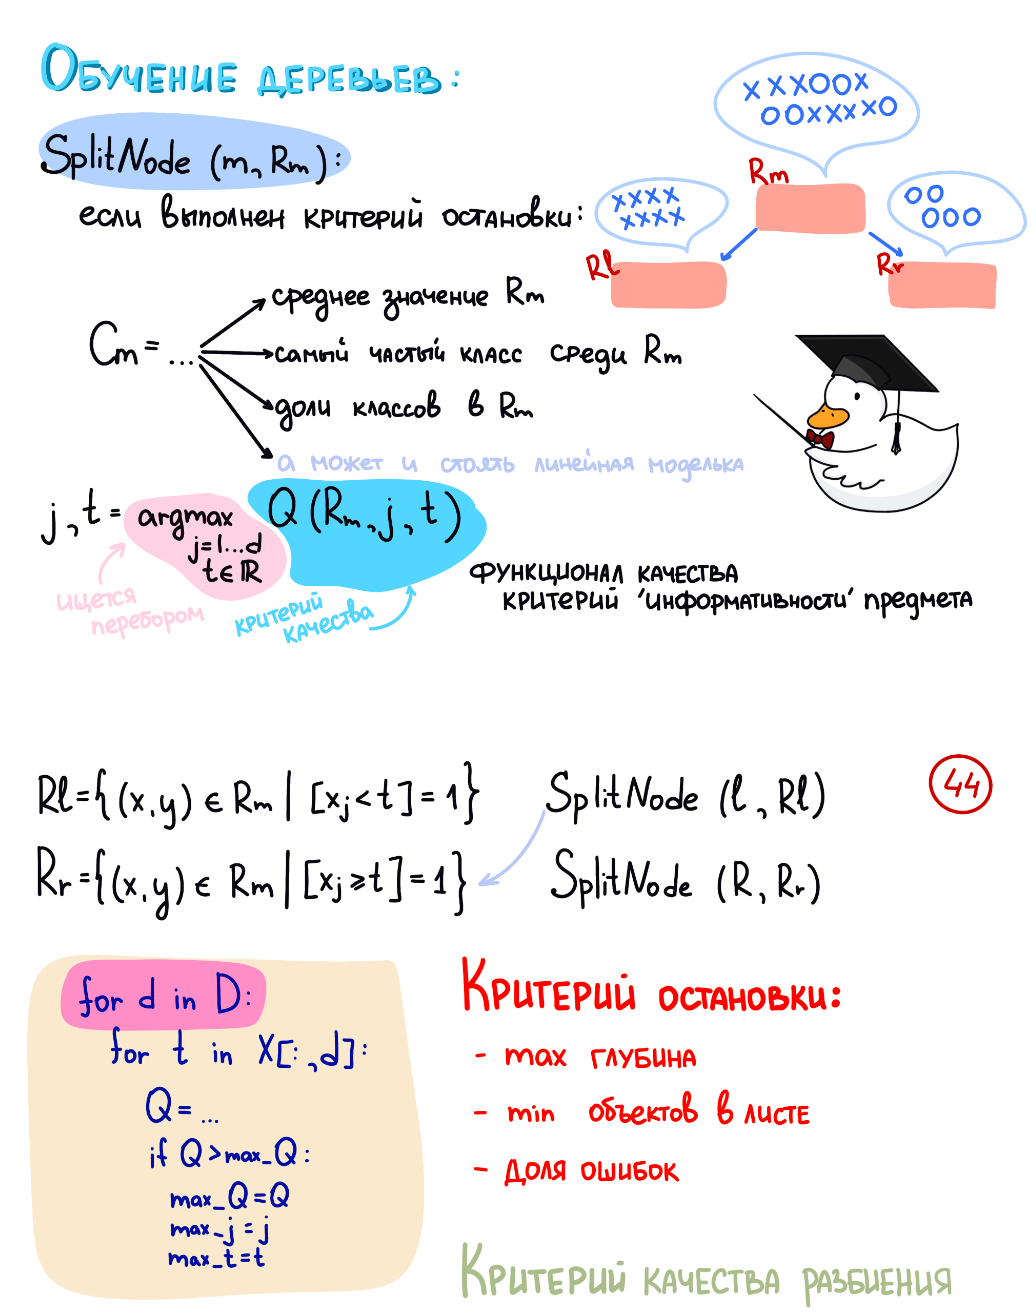

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [36]:
from tree_code import DecisionTree

In [37]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка датасета
data = pd.read_csv("agaricus-lepiota.data", header=None)

# Названия столбцов из файла agaricus-lepiota.names
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
data.columns = columns

# Преобразование категориальных признаков в числовые с помощью LabelEncoder
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Разделение на признаки (X) и целевую переменную (y)
X = data.iloc[:, 1:].values  # Все столбцы, кроме первого
y = data["class"].values     # Первый столбец

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
# проверим для нашего набора - правда ли можно достичь 1
clf = DecisionTreeClassifier(criterion='gini', max_depth=None)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy sklearn: {accuracy_sklearn:.4f}")

Accuracy sklearn: 1.0000


In [40]:
# Обучение решающего дерева
feature_types = ['categorical' for x in X_train]
my_tree = DecisionTree(feature_types)
my_tree.fit(X_train, y_train)

y_pred = my_tree.predict(X_test)
print('test accuracy =', np.sum(y_pred == y_test) / np.size(y_test))

y_pred = my_tree.predict(X_train)
print('train accuracy =', np.sum(y_pred == y_train) / np.size(y_train))

print('depth =', my_tree.depth)

test accuracy = 1.0
train accuracy = 1.0
depth = 10


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [46]:
# Загрузка датасета
data_mushrooms = pd.read_csv("agaricus-lepiota.data", header=None)

# Названия столбцов из файла agaricus-lepiota.names
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
data_mushrooms.columns = columns

# Кодирование классов (нулевой столбец "class")
data_mushrooms['class'] = LabelEncoder().fit_transform(data_mushrooms['class'])

# Вывод первых строк для проверки
print("Dataset: Mushrooms")
print(data_mushrooms.info())

Dataset: Mushrooms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk

In [47]:
# Загрузка датасета tic-tac-toe
data_ttt = pd.read_csv("tic-tac-toe-endgame.csv", header=None)

# Установка названий столбцов
columns = [f"feature_{i}" for i in range(data_ttt.shape[1] - 1)] + ["class"]
data_ttt.columns = columns

# Кодирование классов (последний столбец "class")
data_ttt['class'] = LabelEncoder().fit_transform(data_ttt['class'])

# Вывод первых строк для проверки
print("Dataset: Tic-Tac-Toe")
print(data_ttt.info())

Dataset: Tic-Tac-Toe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_0  959 non-null    object
 1   feature_1  959 non-null    object
 2   feature_2  959 non-null    object
 3   feature_3  959 non-null    object
 4   feature_4  959 non-null    object
 5   feature_5  959 non-null    object
 6   feature_6  959 non-null    object
 7   feature_7  959 non-null    object
 8   feature_8  959 non-null    object
 9   class      959 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 75.0+ KB
None


In [50]:
# Загрузка датасета cars
data_cars = pd.read_csv("car.data", header=None)

# Названия столбцов из файла car.names
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data_cars.columns = columns

# Кодирование классов (последний столбец "class")
data_cars['class'] = data_cars['class'].replace({
    'unacc': 0, 'acc': 0,  # Класс 0
    'good': 1, 'vgood': 1  # Класс 1
})

# Вывод первых строк для проверки
print("Dataset: Cars")
print(data_cars.info())

Dataset: Cars
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 94.6+ KB
None


In [51]:
# Загрузка датасета nursery
data_nursery = pd.read_csv("nursery.data", header=None)

# Названия столбцов из файла nursery.names
columns = [
    "parents", "has_nurs", "form", "children", "housing",
    "finance", "social", "health", "class"
]
data_nursery.columns = columns

# Кодирование классов (последний столбец "class")
data_nursery['class'] = data_nursery['class'].replace({
    'not_recom': 0, 'recommend': 0,  # Класс 0
    'very_recom': 1, 'priority': 1, 'spec_prior': 1  # Класс 1
})

# Вывод первых строк для проверки
print("Dataset: Nursery")
print(data_nursery.info())

Dataset: Nursery
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 911.4+ KB
None


In [54]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
def encode_categorical_features(data):
    """Кодирует все категориальные признаки в датасете."""
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == 'object':  # Проверяем, является ли столбец категориальным
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
            label_encoders[column] = le  # Сохраняем LabelEncoder для обратного преобразования (если потребуется)
    return data, label_encoders

# Кодирование категориальных признаков для mushrooms
data_mushrooms, le_mushrooms = encode_categorical_features(data_mushrooms)
print("Dataset: Mushrooms (encoded)")
print(data_mushrooms.info())

# Кодирование категориальных признаков для tic-tac-toe
data_ttt, le_ttt = encode_categorical_features(data_ttt)
print("\nDataset: Tic-Tac-Toe (encoded)")
print(data_ttt.info())

# Кодирование категориальных признаков для cars
data_cars, le_cars = encode_categorical_features(data_cars)
print("\nDataset: Cars (encoded)")
print(data_cars.info())

# Кодирование категориальных признаков для nursery
data_nursery, le_nursery = encode_categorical_features(data_nursery)
print("\nDataset: Nursery (encoded)")
print(data_nursery.info())

Dataset: Mushrooms (encoded)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color

In [69]:
# Создаем список для хранения результатов
results = []

# Функция для добавления результатов
def add_results(dataset_name, method, accuracy, std_dev):
    results.append({
        "Dataset": dataset_name,
        "Method": method,
        "Accuracy": accuracy,
        "Standard Deviation": std_dev
    })

In [70]:
# DecisionTree, обрабатывающий все признаки как вещественные
clf_real = DecisionTreeClassifier()
scores_real = cross_val_score(clf_real, data_mushrooms.drop(columns=['class']), data_mushrooms['class'], cv=10)
print("DecisionTree (numeric features):")
print(f"Accuracy: {np.mean(scores_real):.4f} ± {np.std(scores_real):.4f}")

# DecisionTree, обрабатывающий все признаки как категориальные
clf_cat = DecisionTreeClassifier(criterion='entropy')
data_mushrooms_cat = data_mushrooms.copy()
for col in data_mushrooms_cat.columns:
    if col != 'class':
        data_mushrooms_cat[col] = data_mushrooms_cat[col].astype('category')  # Указываем тип данных
scores_cat = cross_val_score(clf_cat, data_mushrooms_cat.drop(columns=['class']), data_mushrooms_cat['class'], cv=10)
print("\nDecisionTree (categorical features):")
print(f"Accuracy: {np.mean(scores_cat):.4f} ± {np.std(scores_cat):.4f}")

# DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(data_mushrooms.drop(columns=['class']))
clf_one_hot = DecisionTreeClassifier()
scores_one_hot = cross_val_score(clf_one_hot, X_encoded, data_mushrooms['class'], cv=10)
print("\nDecisionTree (one-hot encoded features):")
print(f"Accuracy: {np.mean(scores_one_hot):.4f} ± {np.std(scores_one_hot):.4f}")

# DecisionTreeClassifier из sklearn
clf_sklearn = DecisionTreeClassifier(random_state=42)
scores_sklearn = cross_val_score(clf_sklearn, data_mushrooms.drop(columns=['class']), data_mushrooms['class'], cv=10)
print("\nDecisionTreeClassifier from sklearn:")
print(f"Accuracy: {np.mean(scores_sklearn):.4f} ± {np.std(scores_sklearn):.4f}")


# Mushrooms
add_results("Mushrooms", "Numeric Features", np.mean(scores_real), np.std(scores_real))
add_results("Mushrooms", "Categorical Features", np.mean(scores_cat), np.std(scores_cat))
add_results("Mushrooms", "One-Hot Encoding", np.mean(scores_one_hot), np.std(scores_one_hot))
add_results("Mushrooms", "Default sklearn", np.mean(scores_sklearn), np.std(scores_sklearn))

DecisionTree (numeric features):
Accuracy: 0.9567 ± 0.0971

DecisionTree (categorical features):
Accuracy: 0.9596 ± 0.0953

DecisionTree (one-hot encoded features):
Accuracy: 0.9683 ± 0.0944

DecisionTreeClassifier from sklearn:
Accuracy: 0.9604 ± 0.0949


In [71]:
# DecisionTree, обрабатывающий все признаки как вещественные
clf_real = DecisionTreeClassifier()
scores_real = cross_val_score(clf_real, data_ttt.drop(columns=['class']), data_ttt['class'], cv=10)
print("DecisionTree (numeric features):")
print(f"Accuracy: {np.mean(scores_real):.4f} ± {np.std(scores_real):.4f}")

# DecisionTree, обрабатывающий все признаки как категориальные
clf_cat = DecisionTreeClassifier(criterion='entropy')
data_ttt_cat = data_ttt.copy()
for col in data_ttt_cat.columns:
    if col != 'class':
        data_ttt_cat[col] = data_ttt_cat[col].astype('category')  # Указываем тип данных
scores_cat = cross_val_score(clf_cat, data_ttt_cat.drop(columns=['class']), data_ttt_cat['class'], cv=10)
print("\nDecisionTree (categorical features):")
print(f"Accuracy: {np.mean(scores_cat):.4f} ± {np.std(scores_cat):.4f}")

# DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(data_ttt.drop(columns=['class']))
clf_one_hot = DecisionTreeClassifier()
scores_one_hot = cross_val_score(clf_one_hot, X_encoded, data_ttt['class'], cv=10)
print("\nDecisionTree (one-hot encoded features):")
print(f"Accuracy: {np.mean(scores_one_hot):.4f} ± {np.std(scores_one_hot):.4f}")

# DecisionTreeClassifier из sklearn
clf_sklearn = DecisionTreeClassifier(random_state=42)
scores_sklearn = cross_val_score(clf_sklearn, data_ttt.drop(columns=['class']), data_ttt['class'], cv=10)
print("\nDecisionTreeClassifier from sklearn:")
print(f"Accuracy: {np.mean(scores_sklearn):.4f} ± {np.std(scores_sklearn):.4f}")

# Tic-Tac-Toe
add_results("Tic-Tac-Toe", "Numeric Features", np.mean(scores_real), np.std(scores_real))
add_results("Tic-Tac-Toe", "Categorical Features", np.mean(scores_cat), np.std(scores_cat))
add_results("Tic-Tac-Toe", "One-Hot Encoding", np.mean(scores_one_hot), np.std(scores_one_hot))
add_results("Tic-Tac-Toe", "Default sklearn", np.mean(scores_sklearn), np.std(scores_sklearn))

DecisionTree (numeric features):
Accuracy: 0.7937 ± 0.1108

DecisionTree (categorical features):
Accuracy: 0.7748 ± 0.1319

DecisionTree (one-hot encoded features):
Accuracy: 0.8175 ± 0.1480

DecisionTreeClassifier from sklearn:
Accuracy: 0.7854 ± 0.1176


In [72]:
# DecisionTree, обрабатывающий все признаки как вещественные
clf_real = DecisionTreeClassifier()
scores_real = cross_val_score(clf_real, data_cars.drop(columns=['class']), data_cars['class'], cv=10)
print("DecisionTree (numeric features):")
print(f"Accuracy: {np.mean(scores_real):.4f} ± {np.std(scores_real):.4f}")

# DecisionTree, обрабатывающий все признаки как категориальные
clf_cat = DecisionTreeClassifier(criterion='entropy')
data_cars_cat = data_cars.copy()
for col in data_cars_cat.columns:
    if col != 'class':
        data_cars_cat[col] = data_cars_cat[col].astype('category')  # Указываем тип данных
scores_cat = cross_val_score(clf_cat, data_cars_cat.drop(columns=['class']), data_cars_cat['class'], cv=10)
print("\nDecisionTree (categorical features):")
print(f"Accuracy: {np.mean(scores_cat):.4f} ± {np.std(scores_cat):.4f}")

# DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding
encoder = OneHotEncoder(sparse_output=False)  # Исправленный параметр
X_encoded = encoder.fit_transform(data_cars.drop(columns=['class']))
clf_one_hot = DecisionTreeClassifier()
scores_one_hot = cross_val_score(clf_one_hot, X_encoded, data_cars['class'], cv=10)
print("\nDecisionTree (one-hot encoded features):")
print(f"Accuracy: {np.mean(scores_one_hot):.4f} ± {np.std(scores_one_hot):.4f}")

# DecisionTreeClassifier из sklearn
clf_sklearn = DecisionTreeClassifier(random_state=42)
scores_sklearn = cross_val_score(clf_sklearn, data_cars.drop(columns=['class']), data_cars['class'], cv=10)
print("\nDecisionTreeClassifier from sklearn:")
print(f"Accuracy: {np.mean(scores_sklearn):.4f} ± {np.std(scores_sklearn):.4f}")

# Cars
add_results("Cars", "Numeric Features", np.mean(scores_real), np.std(scores_real))
add_results("Cars", "Categorical Features", np.mean(scores_cat), np.std(scores_cat))
add_results("Cars", "One-Hot Encoding", np.mean(scores_one_hot), np.std(scores_one_hot))
add_results("Cars", "Default sklearn", np.mean(scores_sklearn), np.std(scores_sklearn))

DecisionTree (numeric features):
Accuracy: 0.9427 ± 0.0317

DecisionTree (categorical features):
Accuracy: 0.9340 ± 0.0382

DecisionTree (one-hot encoded features):
Accuracy: 0.8237 ± 0.2483

DecisionTreeClassifier from sklearn:
Accuracy: 0.9427 ± 0.0317


In [73]:
# DecisionTree, обрабатывающий все признаки как вещественные
clf_real = DecisionTreeClassifier()
scores_real = cross_val_score(clf_real, data_nursery.drop(columns=['class']), data_nursery['class'], cv=10)
print("DecisionTree (numeric features):")
print(f"Accuracy: {np.mean(scores_real):.4f} ± {np.std(scores_real):.4f}")

# DecisionTree, обрабатывающий все признаки как категориальные
clf_cat = DecisionTreeClassifier(criterion='entropy')
data_nursery_cat = data_nursery.copy()
for col in data_nursery_cat.columns:
    if col != 'class':
        data_nursery_cat[col] = data_nursery_cat[col].astype('category')  # Указываем тип данных
scores_cat = cross_val_score(clf_cat, data_nursery_cat.drop(columns=['class']), data_nursery_cat['class'], cv=10)
print("\nDecisionTree (categorical features):")
print(f"Accuracy: {np.mean(scores_cat):.4f} ± {np.std(scores_cat):.4f}")

# DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding
encoder = OneHotEncoder(sparse_output=False)  # Исправленный параметр
X_encoded = encoder.fit_transform(data_nursery.drop(columns=['class']))
clf_one_hot = DecisionTreeClassifier()
scores_one_hot = cross_val_score(clf_one_hot, X_encoded, data_nursery['class'], cv=10)
print("\nDecisionTree (one-hot encoded features):")
print(f"Accuracy: {np.mean(scores_one_hot):.4f} ± {np.std(scores_one_hot):.4f}")

# DecisionTreeClassifier из sklearn
clf_sklearn = DecisionTreeClassifier(random_state=42)
scores_sklearn = cross_val_score(clf_sklearn, data_nursery.drop(columns=['class']), data_nursery['class'], cv=10)
print("\nDecisionTreeClassifier from sklearn:")
print(f"Accuracy: {np.mean(scores_sklearn):.4f} ± {np.std(scores_sklearn):.4f}")

# Nursery
add_results("Nursery", "Numeric Features", np.mean(scores_real), np.std(scores_real))
add_results("Nursery", "Categorical Features", np.mean(scores_cat), np.std(scores_cat))
add_results("Nursery", "One-Hot Encoding", np.mean(scores_one_hot), np.std(scores_one_hot))
add_results("Nursery", "Default sklearn", np.mean(scores_sklearn), np.std(scores_sklearn))

DecisionTree (numeric features):
Accuracy: 0.9997 ± 0.0006

DecisionTree (categorical features):
Accuracy: 0.9997 ± 0.0006

DecisionTree (one-hot encoded features):
Accuracy: 0.9995 ± 0.0007

DecisionTreeClassifier from sklearn:
Accuracy: 0.9997 ± 0.0006


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


In [74]:
results_df = pd.DataFrame(results)
results_df

,Dataset,Method,Accuracy,Standard Deviation
0,Mushrooms,Numeric Features,0.956689,0.097144
1,Mushrooms,Categorical Features,0.959645,0.095251
2,Mushrooms,One-Hot Encoding,0.968265,0.094386
3,Mushrooms,Default sklearn,0.960384,0.094902
4,Tic-Tac-Toe,Numeric Features,0.793684,0.110822
5,Tic-Tac-Toe,Categorical Features,0.774846,0.131851
6,Tic-Tac-Toe,One-Hot Encoding,0.817533,0.147976
7,Tic-Tac-Toe,Default sklearn,0.785351,0.117600
8,Cars,Numeric Features,0.942707,0.031714
9,Cars,Categorical Features,0.934013,0.038240


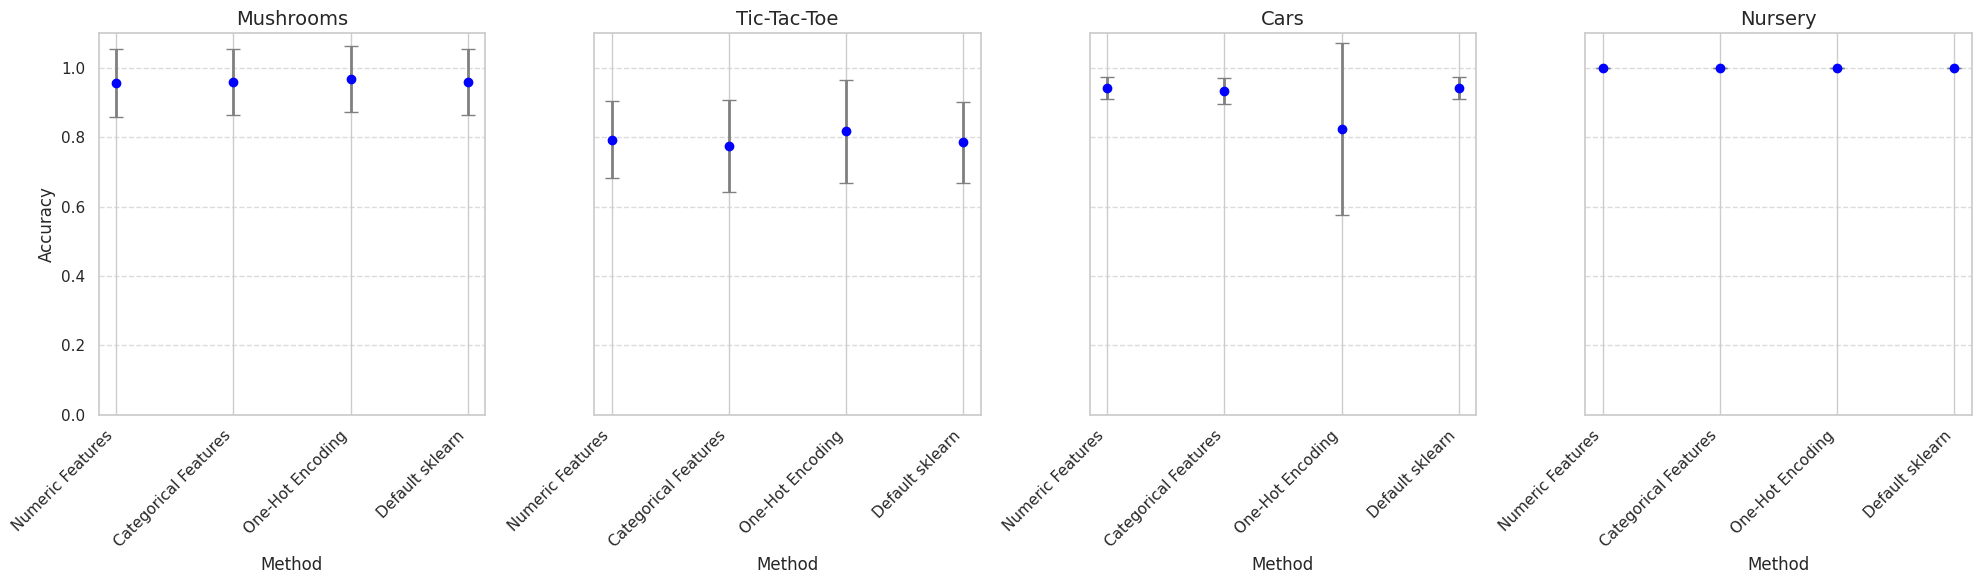

In [76]:
# Группируем данные по датасетам
datasets = results_df["Dataset"].unique()

# Создаем фигуру с 4 графиками в одном ряду
fig, axes = plt.subplots(1, len(datasets), figsize=(20, 6), sharey=True)

for i, dataset in enumerate(datasets):
    subset = results_df[results_df["Dataset"] == dataset]
    methods = subset["Method"]
    accuracies = subset["Accuracy"]
    std_devs = subset["Standard Deviation"]

    x = np.arange(len(methods))
    axes[i].errorbar(x, accuracies, yerr=std_devs, fmt='o', color='blue', ecolor='gray', elinewidth=2, capsize=5)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(methods, rotation=45, ha='right')
    axes[i].set_title(f"{dataset}", fontsize=14)
    axes[i].set_xlabel("Method", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Общая настройка осей
axes[0].set_ylabel("Accuracy", fontsize=12)
plt.ylim(0.0, 1.1)
plt.tight_layout()
plt.show()

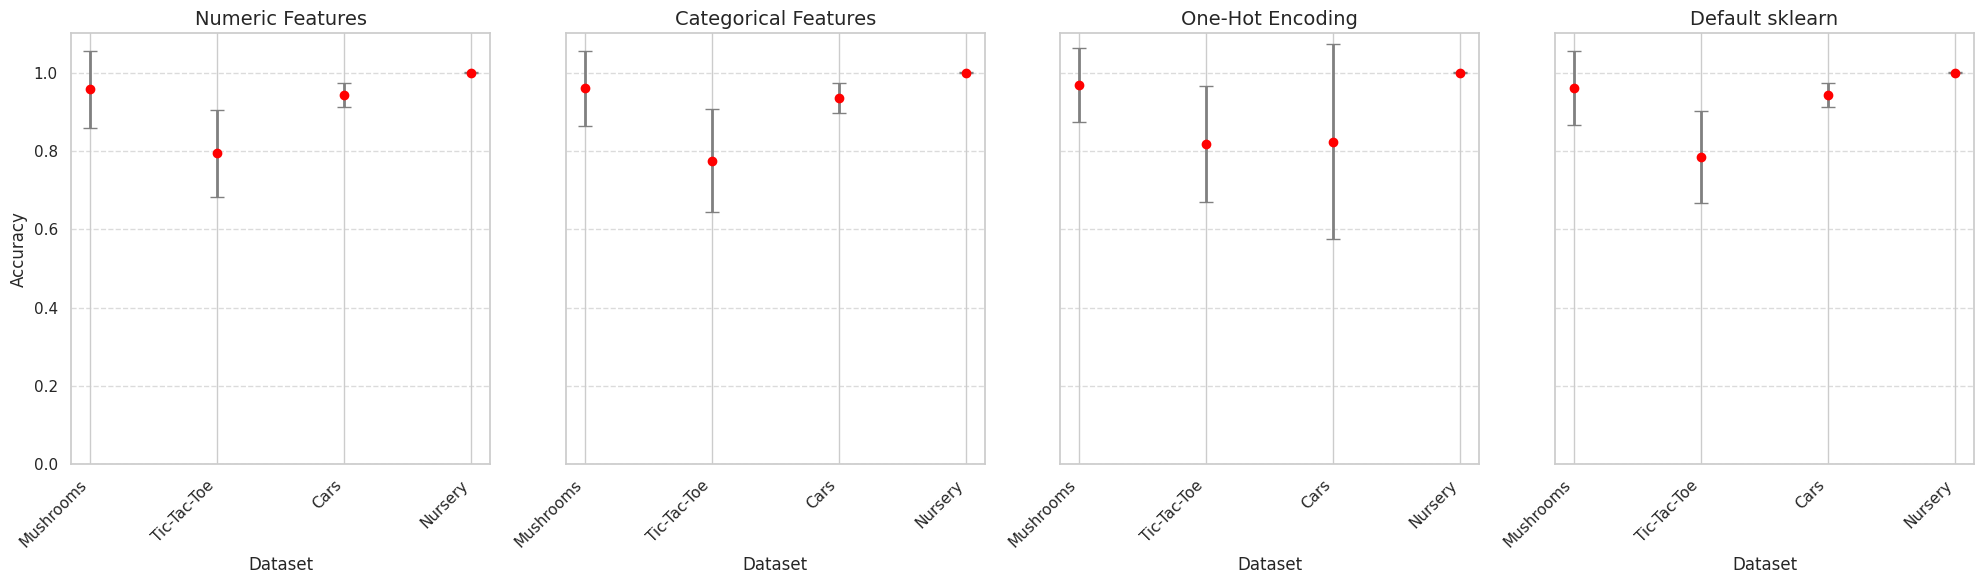

In [78]:
# Группируем данные по методам
methods = results_df["Method"].unique()

# Создаем фигуру с 4 графиками в одном ряду
fig, axes = plt.subplots(1, len(methods), figsize=(20, 6), sharey=True)

for i, method in enumerate(methods):
    subset = results_df[results_df["Method"] == method]
    datasets = subset["Dataset"]
    accuracies = subset["Accuracy"]
    std_devs = subset["Standard Deviation"]

    x = np.arange(len(datasets))
    axes[i].errorbar(x, accuracies, yerr=std_devs, fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=5)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(datasets, rotation=45, ha='right')
    axes[i].set_title(f"{method}", fontsize=14)
    axes[i].set_xlabel("Dataset", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Общая настройка осей
axes[0].set_ylabel("Accuracy", fontsize=12)
plt.ylim(0.0, 1.1)
plt.tight_layout()
plt.show()

Ранжирование алгоритмов на разных наборах данных отличается. На наборе Mushrooms лучшие результаты показывает One-Hot Encoding. На других наборах почти все алгоритмы демонстрируют одинаковую точность, достигая близкого к максимальному значения. Это может быть связано с различиями в структуре данных и количестве уникальных категорий.

Значения признаков в наборах данных играют важную роль. В наборах с преобладанием категориальных признаков, таких как Cars, методы, учитывающие категориальность (например, One-Hot Encoding), показывают нестабильные результаты. На наборах с компактным представлением категорий как в Nursery, этот эффект минимален.

В результатах присутствует случайная комопнента, для уменьшения случайности можно увеличить количество фолдов в кросс-валидации или зафиксировать начальное состояние (random_state) для большей воспроизводимости. Также можно нормализовать или преобразовать данные для улучшения работы алгоритмов.

# Как дела?

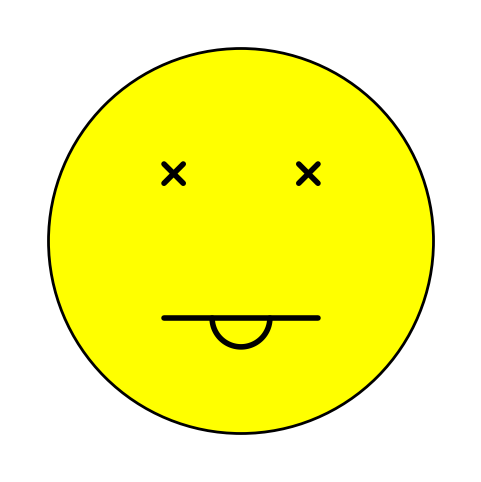

In [97]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
fig, ax = plt.subplots(figsize=(6, 6))

face = plt.Circle((0, 0), 1, color='yellow', ec='black', lw=2)
ax.add_artist(face)

ax.plot([-0.3, -0.4], [0.3, 0.4], color='black', lw=4)
ax.plot([-0.4, -0.3], [0.3, 0.4], color='black', lw=4)

ax.plot([0.3, 0.4], [0.3, 0.4], color='black', lw=4)
ax.plot([0.4, 0.3], [0.3, 0.4], color='black', lw=4)

ax.plot([-0.4, 0.4], [-0.4, -0.4], color='black', lw=4)

theta = np.linspace(np.pi, 2 * np.pi, 100)
x = 0.15 * np.cos(theta)
y = -0.4 + 0.15 * np.sin(theta)
ax.plot(x, y, color='black', lw=4)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.axis('off')

plt.show()